In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Step 1:Import data
cars = pd.read_csv(r"E:/Dataset/cars_clus.csv")
cars.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


In [3]:
# Removing labels col(manufac, model) to make it more unsupervised
df=cars.drop(columns=['manufact','model']) 
df

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,16.919,16.360,0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,39.384,19.875,0,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,8.588,29.725,0,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,18.780,23.555,0,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,9.761,11.425,0,14.90,2.0,115,98.9,68.3,163.3,2.767,14.5,26.0,2.278,0
113,83.721,13.240,0,16.70,2.0,115,98.9,68.3,172.3,2.853,14.5,26.0,4.427,0
114,51.102,16.725,0,21.20,1.8,150,106.4,68.5,184.1,3.043,16.4,27.0,3.934,0
115,9.569,16.575,0,19.99,2.0,115,97.4,66.7,160.4,3.079,13.7,26.0,2.259,0


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='mpg'>

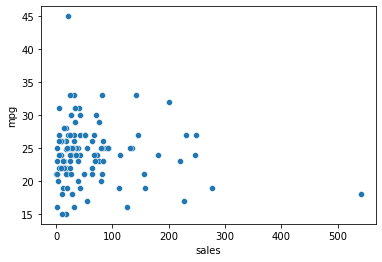

In [4]:
#Before clustering
sns.scatterplot(df['sales'],df['mpg'])

In [5]:
#Normalizing the values
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [6]:
df_scale = scale.fit_transform(df)
df_scale

array([[0.0311018 , 0.17951595, 0.        , ..., 0.43333333, 0.59235294,
        0.        ],
       [0.07266894, 0.2358551 , 0.        , ..., 0.33333333, 0.69176471,
        0.        ],
       [0.0156869 , 0.39373297, 0.        , ..., 0.23333333, 0.51258824,
        0.        ],
       ...,
       [0.09435083, 0.18536624, 0.        , ..., 0.4       , 0.72247059,
        0.        ],
       [0.01750205, 0.18296201, 0.        , ..., 0.36666667, 0.52541176,
        0.        ],
       [0.01015078, 0.1378426 , 0.        , ..., 0.36666667, 0.46223529,
        0.        ]])

In [7]:
df_scale = pd.DataFrame(df_scale,columns=df.columns)
df_scale

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,0.031102,0.179516,0.0,0.167178,0.114286,0.215190,0.186551,0.281437,0.306258,0.231056,0.133641,0.433333,0.592353,0.0
1,0.072669,0.235855,0.0,0.261228,0.314286,0.430380,0.336226,0.461078,0.579228,0.503727,0.317972,0.333333,0.691765,0.0
2,0.015687,0.393733,0.0,0.446603,0.357143,0.392405,0.477223,0.526946,0.628495,0.607143,0.354839,0.233333,0.512588,0.0
3,0.037537,0.274002,0.0,0.201118,0.114286,0.240506,0.216920,0.335329,0.380826,0.342547,0.281106,0.400000,0.614353,0.0
4,0.034545,0.294839,0.0,0.336877,0.257143,0.367089,0.349241,0.808383,0.567244,0.517391,0.377880,0.233333,0.604706,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.017857,0.100417,0.0,0.077217,0.142857,0.151899,0.136659,0.341317,0.185087,0.270807,0.193548,0.366667,0.527647,0.0
113,0.154706,0.129508,0.0,0.101752,0.142857,0.151899,0.136659,0.341317,0.304927,0.297516,0.193548,0.366667,0.780471,0.0
114,0.094351,0.185366,0.0,0.163089,0.114286,0.240506,0.299349,0.353293,0.462051,0.356522,0.281106,0.400000,0.722471,0.0
115,0.017502,0.182962,0.0,0.146596,0.142857,0.151899,0.104121,0.245509,0.146471,0.367702,0.156682,0.366667,0.525412,0.0


# Hierarchical clustering : Hierarchical clustering is a popular method for grouping objects. It creates groups so that objects within a group are similar to each other and different from objects in other groups

In [8]:
from scipy.cluster import hierarchy

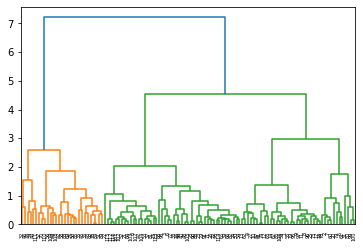

In [9]:
dendogram = hierarchy.dendrogram(hierarchy.linkage(df_scale,method = 'ward'))

In [10]:
# Agglomerative approach
from sklearn.cluster import AgglomerativeClustering

In [11]:
a = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward') 
#by dandogram we can say 2 and euclidean formula we are using to find the distance

In [12]:
clusters = a.fit_predict(df_scale)
clusters

array([2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0,
       1, 1, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 2], dtype=int64)

In [13]:
cars['Clusters']=clusters #Adding new col in dataframe

In [14]:
cars.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,Clusters
0,Acura,Integra,16.919,16.360,0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,2
1,Acura,TL,39.384,19.875,0,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,0
2,Acura,RL,8.588,29.725,0,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,0
3,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,2
4,Audi,A6,18.780,23.555,0,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,0


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='mpg'>

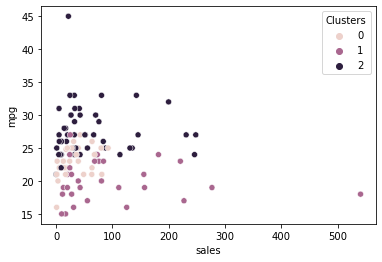

In [15]:
#Lets check by again plotting scatter plot After clustering
sns.scatterplot(df['sales'],df['mpg'],hue=cars['Clusters'])